# Predict home value using set of Regression models

https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-regression-algorithms/

**1. Load libraries**

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

import pandas as pd, numpy as np
import sys
import io

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot

**2. Helper Functions**

In [47]:
def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2
    # plt.subplots(ncols=2, figsize=(10,4))
    # plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    # plt.subplot(121)
    # plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    # plt.title('Actual')

    # plt.subplot(122)
    # plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    # plt.title('Predicted')

    fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
    fig.suptitle('Actual vs Predicted data : ' + model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))
    # Actual data plot
    axes[0].scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    axes[0].set_title('Actual')
    # Get limits from the actual data plot
    x_min, x_max = axes[0].get_xlim()
    y_min, y_max = axes[0].get_ylim()
    # Predicted data plot
    axes[1].scatter(X_test, y_pred, alpha=0.8, color='#E5E88B')
    axes[1].set_title('Predicted')
    # Set the same limits for the predicted data plot
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_ylim(y_min, y_max)

    plt.show()

def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

def two_vs_three(x_test,y_test,y_pred,z=None, isLinear = False) :

    area = 60

    fig = plt.figure(figsize=(12,6))
    fig.suptitle('2D and 3D view of sales price data')

    # First subplot
    ax = fig.add_subplot(1, 2,1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('YEAR BUILT')
    ax.set_ylabel('SELLING PRICE')

    plt.title('YEARBUILT vs SALEPRICE')

    if not isLinear :
    # Second subplot
        ax = fig.add_subplot(1,2,2, projection='3d')

        ax.scatter(z, x_test, y_test, color='blue', marker='o')
        ax.plot(z, x_test, y_pred, alpha=0.9,color='red', linewidth=2)
        ax.set_ylabel('YEAR BUILT')
        ax.set_zlabel('SELLING PRICE')
        ax.set_xlabel('LOT AREA')

    plt.title('LOT AREA vs YEAR BUILT vs SELLING PRICE')

    plt.show()

**3. Load and explore data**

In [3]:
df =  pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
df.head()

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


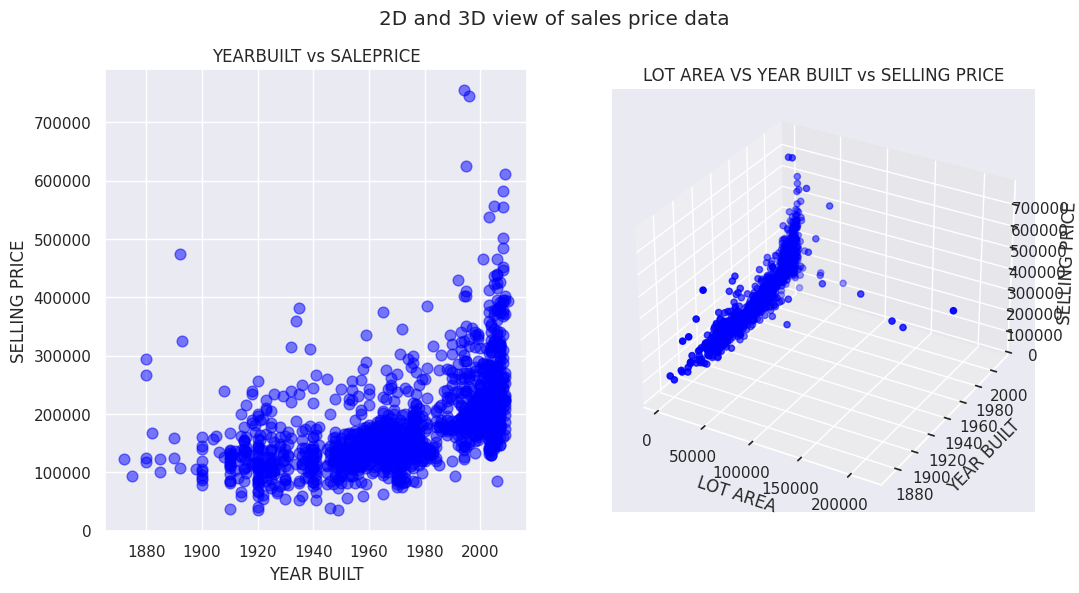

In [48]:
area = 60
x = df['YEARBUILT']
y = df['SALEPRICE']
z = df['LOTAREA']


fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of sales price data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.5,color='blue', s= area)
ax.set_xlabel('YEAR BUILT')
ax.set_ylabel('SELLING PRICE')

plt.title('YEARBUILT vs SALEPRICE')

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, color='blue', marker='o')

ax.set_ylabel('YEAR BUILT')
ax.set_zlabel('SELLING PRICE')
ax.set_xlabel('LOT AREA')

plt.title('LOT AREA VS YEAR BUILT vs SELLING PRICE')

plt.show()


<ipython-input-49-0ca0604dc02f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['SALEPRICE'])


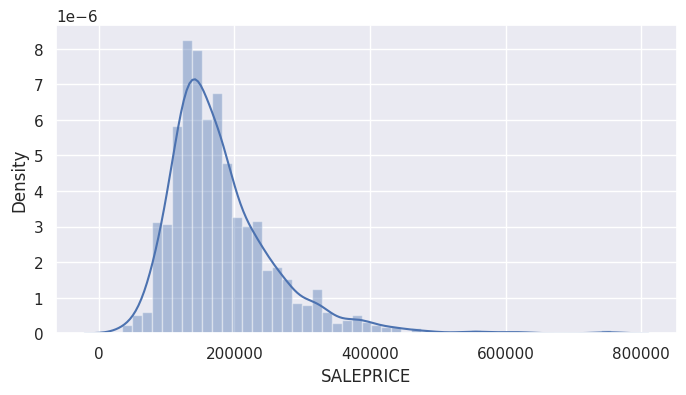

In [49]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(df['SALEPRICE'])
plt.show()

In [8]:
print("The dataset contains columns of the following data types : \n" +str(df.dtypes))

The dataset contains columns of the following data types : 
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


In [9]:
print("The dataset contains following number of records for each of the columns : \n" +str(df.count()))

The dataset contains following number of records for each of the columns : 
ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64


In [12]:
df.isnull().sum()

ID                 0
LOTAREA            0
BLDGTYPE           0
HOUSESTYLE         0
OVERALLCOND        0
YEARBUILT          0
ROOFSTYLE          0
EXTERCOND          0
FOUNDATION         0
BSMTCOND          37
HEATING            0
HEATINGQC          0
CENTRALAIR         0
ELECTRICAL         1
FULLBATH           0
HALFBATH           0
BEDROOMABVGR       0
KITCHENABVGR       0
KITCHENQUAL        0
TOTRMSABVGRD       0
FIREPLACES         0
FIREPLACEQU      690
GARAGETYPE        81
GARAGEFINISH      81
GARAGECARS         0
GARAGECOND        81
POOLAREA           0
POOLQC          1453
FENCE           1179
MOSOLD             0
YRSOLD             0
SALEPRICE          0
dtype: int64

**4. Data preparation**

In [14]:
#remove columns that are not required
df.drop(['ID'], axis=1, inplace=True)
df.head()

,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,GasA,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [16]:
# Defining the categorical columns
categoricalColumns = df.select_dtypes(include=['object']).columns

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')


In [17]:
# Defining the numerical columns
numericalColumns = [col for col in df.select_dtypes(include=['float','int']).columns if col not in ['SALEPRICE']]
print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

Numerical columns : 
['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD']


In [18]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")


#. The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df)
print("Data after transforming :")
print(df_pd_temp)

df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.00800e+03
  2.08500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.00700e+03
  1.81500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.00800e+03
  2.23500e+05]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.01000e+03
  2.66500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 2.01000e+03
  1.42125e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 2.00800e+03
  1.47500e+05]]
Data after transforming :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59911110e+00
   1.38777489e-01  2.08500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
  -6.14438622e-01  1.81500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.90891347e-01
   1.38777489e-01  2.23500000e+05]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
   1.64520971e+00  2.66500000e+05]
 [ 1.00000000e+00  0.00000000e+

In [19]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df.drop(['SALEPRICE'], axis=1)

label = pd.DataFrame(df, columns = ['SALEPRICE'])
#label_encoder = LabelEncoder()
label = df['SALEPRICE']

#label = label_encoder.fit_transform(label)
print(" value of label : " + str(label))




 value of label : 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SALEPRICE, Length: 1460, dtype: int64


**5. Single variable Linear regression**

In [50]:
#X = features['YEARBUILT'].values.reshape(-1,1)
X = pd.DataFrame(features['YEARBUILT'])
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X,label , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train_slr.shape)+
      " Output label" + str(y_train_slr.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test_slr.shape)+
      " Output label" + str(y_test_slr.shape))

Dimensions of datasets that will be used for training : Input features(1095, 1) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 1) Output label(365,)


In [51]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

slRegressor = LinearRegression()

  # slRegressor.fit(X_train_slr,y_train_slr)
  # y_pred_slr= slRegressor.predict(X_test_slr)

slr_model = Pipeline(steps=[
  ('preprocessorNum',ColumnTransformer(transformers=[('num', numerical_transformer, lambda x: x.columns)], remainder="passthrough")),
  ('regressor', slRegressor)])
slr_model.fit(X_train_slr,y_train_slr)
y_pred_slr= slr_model.predict(X_test_slr)

print(slRegressor)

LinearRegression()


In [52]:
print('Intercept: \n',slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 180733.14977168938
Coefficients: 
 [41332.2434841]


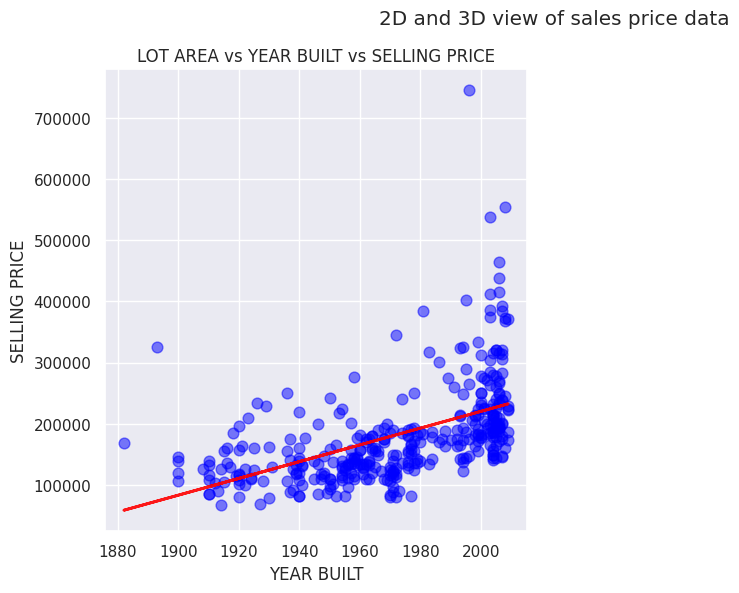

In [53]:
#two_vs_three(X_test_slr[:,0],y_test_slr,y_pred_slr,None, True)
two_vs_three(X_test_slr['YEARBUILT'],y_test_slr,y_pred_slr,None, True)

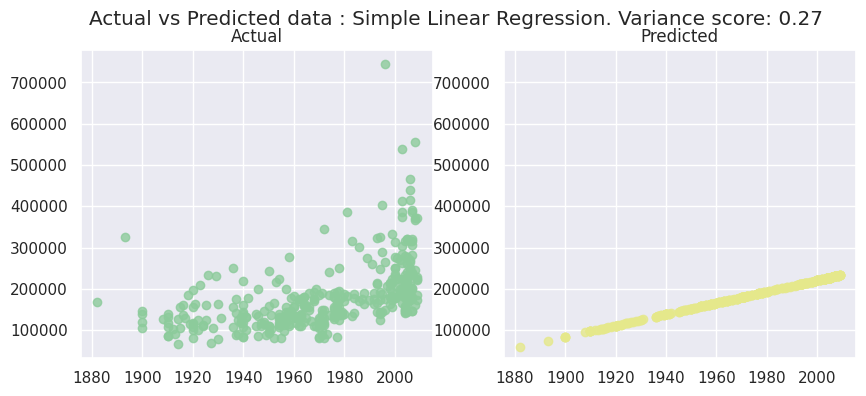

In [54]:
two_d_compare(X_test_slr,y_test_slr,y_pred_slr,model_name)

In [55]:
slrMetrics = model_metrics(slRegressor,y_test_slr,y_pred_slr)

Mean squared error: 4830018416.25
R2 score: 0.27


**6. Multiple variables Linear Regression**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30) Output label(365,)


In [58]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', mlRegressor)])

mlr_model.fit(X_train,y_train)

y_pred_mlr= mlr_model.predict(X_test)

print(mlRegressor)

LinearRegression()


In [59]:
print('Intercept: \n',mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)

Intercept: 
 4.145608815940271e+17
Coefficients: 
 [ 6.63248150e+12  6.63248150e+12  6.63248150e+12  6.63248148e+12
  6.63248149e+12  1.32223912e+17  1.32223912e+17  1.32223912e+17
  1.32223912e+17  1.32223912e+17  1.32223912e+17  1.32223912e+17
  1.32223912e+17  8.47815872e+15  8.47815872e+15  8.47815872e+15
  8.47815872e+15  8.47815872e+15  8.47815872e+15 -7.64084110e+16
 -7.64084110e+16 -7.64084110e+16 -7.64084110e+16 -7.64084110e+16
 -8.91918817e+16 -8.91918817e+16 -8.91918817e+16 -8.91918817e+16
 -8.91918817e+16 -8.91918817e+16 -1.75150292e+16 -1.75150292e+16
 -1.75150292e+16 -1.75150292e+16 -1.43894611e+16 -1.43894611e+16
 -1.43894611e+16 -1.43894611e+16 -1.43894611e+16 -1.43894611e+16
 -7.35585512e+16 -7.35585512e+16 -7.35585512e+16 -7.35585512e+16
 -7.35585512e+16 -3.31051200e+15 -3.31051200e+15  1.28257815e+16
  1.28257815e+16  1.28257815e+16  1.28257815e+16  1.28257815e+16
 -3.63252765e+16 -3.63252765e+16 -3.63252765e+16 -3.63252765e+16
 -1.90576992e+16 -1.90576992e+16 -1.905

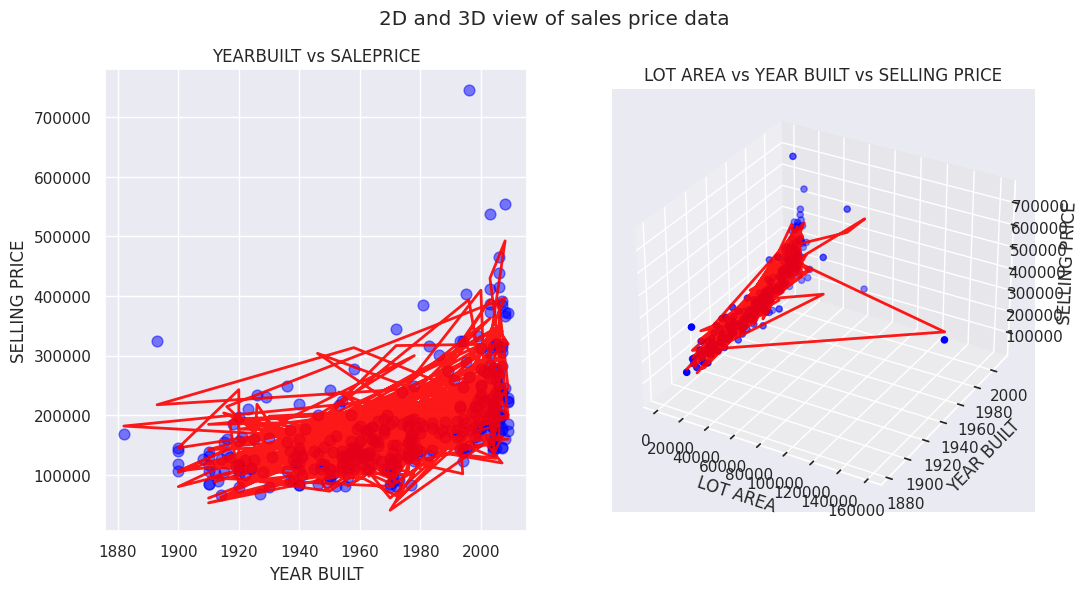

In [60]:
two_vs_three(X_test['YEARBUILT'],y_test,y_pred_mlr,X_test['LOTAREA'], False)

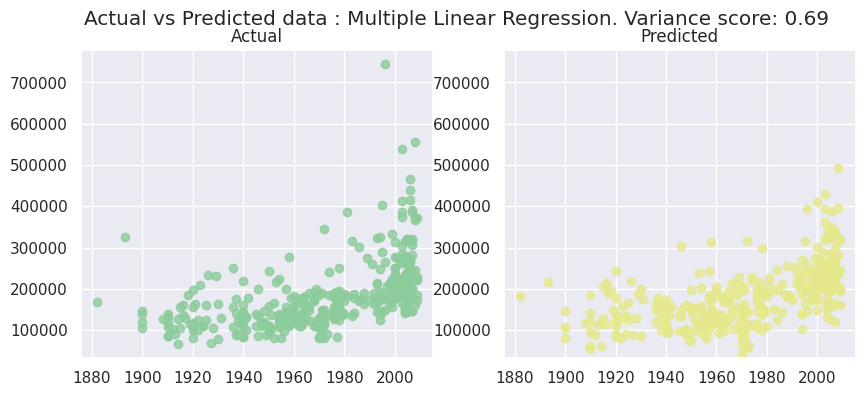

In [61]:
two_d_compare(X_test['YEARBUILT'],y_test,y_pred_mlr,model_name)

In [62]:
mlrMetrics = model_metrics(mlRegressor,y_test,y_pred_mlr)

Mean squared error: 2038962889.66
R2 score: 0.69


**7. Polynomial Linear Regression model**

In [63]:
X = features.iloc[:, [0,4]].values # 'LOTAREA' & 'YEARBUILD'
X_train, X_test, y_train, y_test = train_test_split(X,label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 2) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 2) Output label(365,)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model_name = 'Polynomial Linear Regression'

polynomial_features= PolynomialFeatures(degree=3)
plRegressor = LinearRegression()

plr_model = Pipeline(steps=[('polyFeature',polynomial_features ),('regressor', plRegressor)])

plr_model.fit(X_train,y_train)

y_pred_plr= plr_model.predict(X_test)

print(plRegressor)

LinearRegression()


In [65]:
print('Intercept: \n',plRegressor.intercept_)
print('Coefficients: \n', plRegressor.coef_)

Intercept: 
 7962192.719100944
Coefficients: 
 [ 0.00000000e+00  5.86667895e+03 -2.85949362e-01  1.21979893e-03
 -6.03747960e+00 -6.54549360e+00  2.54658516e-10 -6.61226593e-07
  1.55487252e-03  2.29378553e-03]


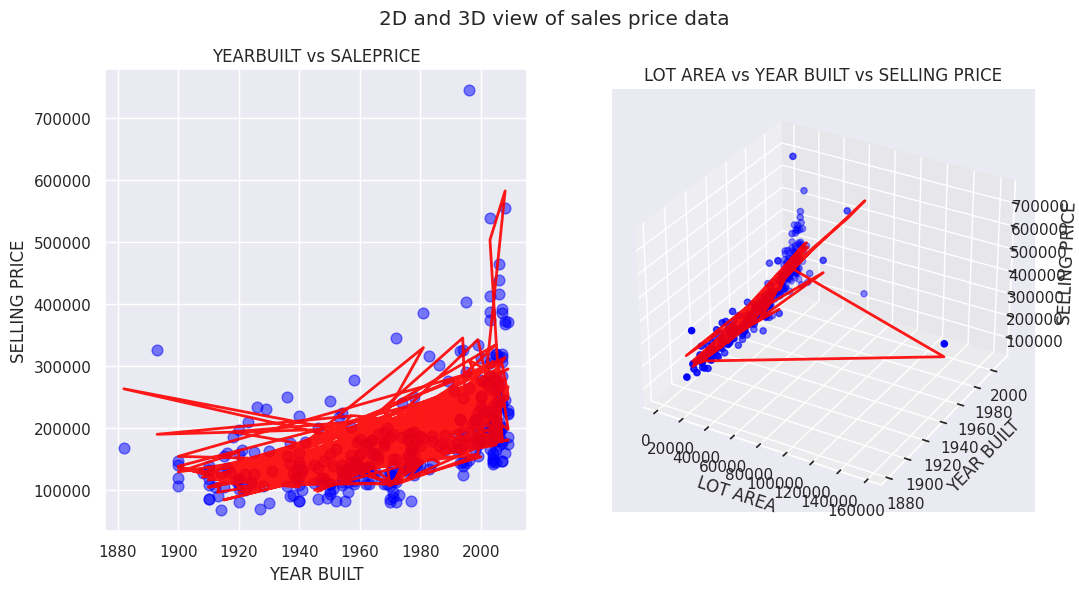

In [66]:
two_vs_three(X_test[:,1],y_test,y_pred_plr,X_test[:,0], False)

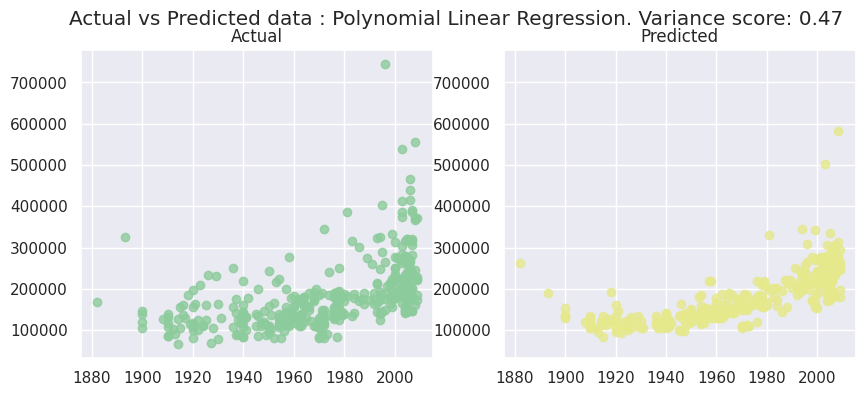

In [67]:
two_d_compare(X_test[:,1],y_test,y_pred_plr,model_name)

In [68]:
plrMetrics = model_metrics(plRegressor,y_test,y_pred_plr)

Mean squared error: 3515419655.46
R2 score: 0.47


**8. Decigion tree Regressor**

In [69]:

X_train, X_test, y_train, y_test = train_test_split(features,df['SALEPRICE'] , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30) Output label(365,)


In [70]:
from sklearn.tree import DecisionTreeRegressor

model_name = "Decision Tree Regressor"

decisionTreeRegressor = DecisionTreeRegressor(random_state=0,max_features=30)

dtr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', decisionTreeRegressor)])

dtr_model.fit(X_train,y_train)

y_pred_dtr = dtr_model.predict(X_test)

print(decisionTreeRegressor)

DecisionTreeRegressor(max_features=30, random_state=0)


In [71]:
export_graphviz(decisionTreeRegressor, out_file ='tree.dot')
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

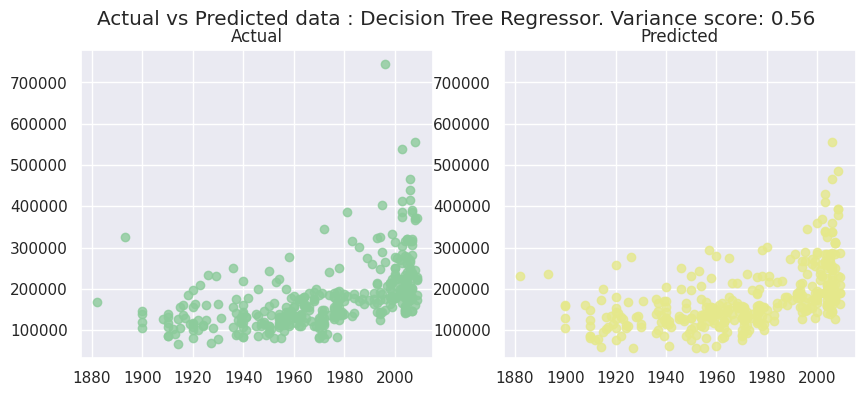

In [72]:
two_d_compare(X_test['YEARBUILT'],y_test,y_pred_dtr,model_name)

In [73]:
dtrMetrics = model_metrics(decisionTreeRegressor,y_test,y_pred_dtr)

Mean squared error: 2912093284.03
R2 score: 0.56


**9. Random Forest Regression**

In [74]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', randomForestRegressor)])

rfr_model.fit(X_train,y_train)

y_pred_rfr = rfr_model.predict(X_test)


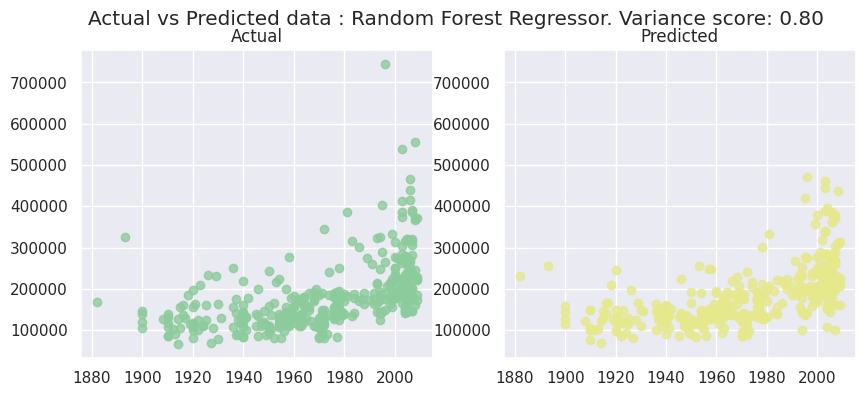

In [75]:
two_d_compare(X_test['YEARBUILT'],y_test,y_pred_rfr,model_name)

In [76]:
rfrMetrics = model_metrics(randomForestRegressor,y_test,y_pred_rfr)

Mean squared error: 1320832739.58
R2 score: 0.80


**10. Comparative study of different regression algorithms.**

<ipython-input-77-516b781327c5>:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Polynomial Lin', 'Decision Tree','Random Forest'))


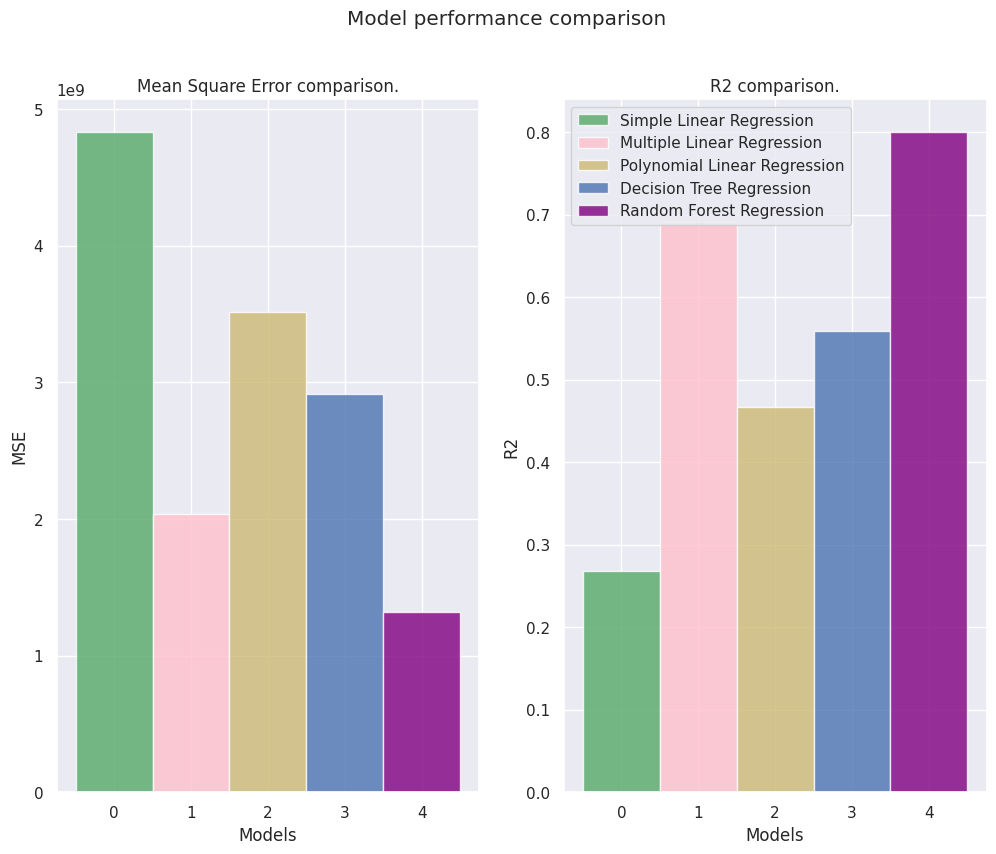

In [77]:

n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8


area = 60
plt.subplots(ncols=2, figsize=(12,9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, slrMetrics[0], bar_width,
alpha=opacity,
color='g',
label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[0], bar_width,
alpha=opacity,
color='pink',
label='Multiple Linear Regression')

rects3 = plt.bar(index + bar_width*2, plrMetrics[0], bar_width,
alpha=opacity,
color='y',
label='Polynomial Linear Regression')

rects4 = plt.bar(index + bar_width*3, dtrMetrics[0], bar_width,
alpha=opacity,
color='b',
label='Decision Tree Regression')


rects6 = plt.bar(index + bar_width*4, rfrMetrics[0], bar_width,
alpha=opacity,
color='purple',
label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Square Error comparison.')
#ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Polynomial Lin', 'Decision Tree','Random Forest'))

plt.subplot(122)

rects1 = plt.bar(index, slrMetrics[1], bar_width,
alpha=opacity,
color='g',
label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[1], bar_width,
alpha=opacity,
color='pink',
label='Multiple Linear Regression')

rects3 = plt.bar(index + bar_width*2, plrMetrics[1], bar_width,
alpha=opacity,
color='y',
label='Polynomial Linear Regression')

rects4 = plt.bar(index + bar_width*3, dtrMetrics[1], bar_width,
alpha=opacity,
color='b',
label='Decision Tree Regression')


rects6 = plt.bar(index + bar_width*4, rfrMetrics[1], bar_width,
alpha=opacity,
color='purple',
label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Polynomial Lin', 'Decision Tree','Random Forest'))



plt.legend()
plt.show()